In [43]:
import spotipy
import pandas as pd
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="xx",
                                                           client_secret="xx"))

In [2]:
results = sp.user_playlist_tracks("spotify", "4SAp2pqkCTYnu3midNetQ7")
tracks = results['items']

for oset in range(100,results['total'],100):
    results = sp.user_playlist_tracks("spotify", "4SAp2pqkCTYnu3midNetQ7", offset=oset)
    tracks += results['items']
len(tracks)

116

In [3]:
def get_playlist_tracks(username, playlist_id):
    
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

tracks = get_playlist_tracks("spotify", "4SAp2pqkCTYnu3midNetQ7")

In [4]:
tracks

[{'added_at': '2021-10-08T06:48:47Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hbhz741mqsyfv0zafwby1nbq0'},
   'href': 'https://api.spotify.com/v1/users/hbhz741mqsyfv0zafwby1nbq0',
   'id': 'hbhz741mqsyfv0zafwby1nbq0',
   'type': 'user',
   'uri': 'spotify:user:hbhz741mqsyfv0zafwby1nbq0'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7f5Zgnp2spUuuzKplmRkt7'},
      'href': 'https://api.spotify.com/v1/artists/7f5Zgnp2spUuuzKplmRkt7',
      'id': '7f5Zgnp2spUuuzKplmRkt7',
      'name': 'Lost Frequencies',
      'type': 'artist',
      'uri': 'spotify:artist:7f5Zgnp2spUuuzKplmRkt7'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/6ydoSd3N2mwgwBHtF6K7eX'},
      'href': 'https://api.spotify.com/v1/artists/6ydoSd3N2mwgwBHtF6K7eX',
      'id': '6ydoSd3N2mwgwBHtF6K7eX',
      'name': 'Calum Scott',
      'type': 'a

In [5]:
def get_playlist_tracks(username, playlist_id):
    
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

In [6]:
def get_artists_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        for artist_info in artists_info:
            artists.append(artist_info['name'])
    
    return list(set(artists))

In [7]:
def get_artist_ids_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists_ids = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        for artist_info in artists_info:
            artists_ids.append(artist_info['id'])
            
    return list(set(artists_ids))

In [16]:
def get_songs_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    songs = []
    
    for track in tracks_from_playlist:
        songs.append(track['track']['name'])
    
    return list(set(songs))

In [17]:
def get_song_id_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    song_id = []
    
    for track in tracks_from_playlist:
        song_id.append(track['track']['id'])
    
    return list(set(song_id))

In [10]:
artists = get_artists_from_playlist("4SAp2pqkCTYnu3midNetQ7")
artists

['AINT',
 'Beemow',
 'Feb',
 'The High',
 'Paige',
 'ESound',
 'Kungs',
 'Nick Martin',
 'Purple Disco Machine',
 'Sophie and the Giants',
 'Syrenne',
 'Georgia Mos',
 'Gia Koka',
 'Michael Ford',
 'DJ Frog',
 'Jorja Smith',
 'Nicola Fasano',
 'ManyFew',
 'Nathan Sinclair',
 'Chumash',
 'ZEXTONE',
 'Mary Leay',
 'Tiësto',
 'Rock Da Cat',
 'MÏETI',
 'Becky Hill',
 'coastkid',
 'James Carter',
 'Viva La Panda',
 'StolenKidz',
 'Rudimental',
 'Haasy',
 'Framed Stories',
 'Cape Cub',
 'SICKWENZ',
 'Aloe Blacc',
 'Jada',
 'RAYE',
 'SOOBE',
 'The Crushboys',
 'Gabry Ponte',
 'offrami',
 'HUTS',
 'Dayna Madison',
 'Zwette',
 'Johnny Balik',
 'Martin Jensen',
 'R3YAN',
 'Lost Frequencies',
 'Nathan Goshen',
 'Eduarda Aragão',
 'Plastik Funk',
 'Courtney Drummey',
 'Kid On The Block',
 'Maverick Sabre',
 'Paolo Pellegrino',
 "Cookin' On 3 Burners",
 'MOLOW',
 'Jack Wins',
 'Dmitry Ko',
 'Sam Welch',
 'Master KG',
 'Teddy Beats',
 'SOMMA',
 'Hartzon',
 'Tim Bell',
 'James Hersey',
 'Bless You',


In [11]:
artists_id = get_artist_ids_from_playlist("4SAp2pqkCTYnu3midNetQ7")
artists_id

['0id62QV2SZZfvBn9xpmuCl',
 '3MyFDtqB80WZvbtCZRsekM',
 '7Dz9goFmVZZqvJxZoKg7pF',
 '5mKNjpx3SmjNqtxQTmuo9Z',
 '6UI6PW7WI2jz4SF5xllpgI',
 '6M2wZ9GZgrQXHCFfjv46we',
 '4n7LqAJhu3k6rrKMu3VfDa',
 '6zFDmr6TUlLrZ3H2KQK0KA',
 '4u4pBjsrswz2nFyd0rClNw',
 '2o5jDhtHVPhrJdv3cEQ99Z',
 '28uJnu5EsrGml2tBd7y8ts',
 '2Mb6xKUfphTNZ7PiDudasm',
 '5ee4yhrWOxaxvL77BoVpVR',
 '4Zv4yFnzY2v8IE2Fo0pqY8',
 '6thT1by4MprLKxnVYtqQik',
 '1ZXJ2W76oJTt9OOjE1qInf',
 '1TgPKG2Y9MClbu3Y1NgqP3',
 '4ON1ruy5ijE7ZPQthbrkgI',
 '54c912G25eEURRdyPfcqIH',
 '2WBJQGf1bT1kxuoqziH5g4',
 '4FrXHrpbDLNyO3pbVv8RmF',
 '6d4AePmkVnbu2qIbT6vsem',
 '7qVyaRDqZ0T20SW7l1VzMX',
 '0Nj6EN5mur7EJHl0aZuGP7',
 '4S8NmgM7oJ188sKp1waZpy',
 '33W1pnW9zScZtYTnAoWnOT',
 '2IjiuEObrCKyZvSb8xLxG9',
 '6sWSaBb5ToNwrlsPBtKWhN',
 '7f5Zgnp2spUuuzKplmRkt7',
 '6fllSzvyC7OruOFZisOELq',
 '45dkTj5sMRSjrmBSBeiHym',
 '7eKtGS8Huzy0vi0KVmNfqE',
 '28E36JWtZHSjaWmKurU4x6',
 '3xFkHylXN9yHzwCQBypRFn',
 '5ENS85nZShljwNgg4wFD7D',
 '733pYGuQ9xwCh15uK2VWT1',
 '0dS5IlInNc5Qq0wIrFTKob',
 

In [18]:
song_id = get_song_id_from_playlist("4SAp2pqkCTYnu3midNetQ7")
song_id

['5uJELEkqQ5x30x1uy5rvu4',
 '0fyJvqK3rRIPc5kddsnI8l',
 '1DFD5Fotzgn6yYXkYsKiGs',
 '53GX9uiJ8qCVuqG5Wt8JE5',
 '3Ty0KLQGMirLdb5jwPLcto',
 '6FPeW5MjVf4iLLmSMh9gkf',
 '6W5Oca7EnKQZj6Ev8RS5Ly',
 '2EHVjRFRSsXQaHAsys74Us',
 '0kTIH2zbc1jvIHoCOCoNnr',
 '2x0RZdkZcD8QRI53XT4GI5',
 '736pHPkEDVRiMXdzAiiEjX',
 '5UK60M2g3BxZQTJixovvRw',
 '1YuHiH8c4QIJuSBakEAwT9',
 '1MDRlfYEfAQoW1bUZfa0wy',
 '47gbC1YiZZYaWqMRpLhi3e',
 '4MqOmncoXWxIHBjiWQezjn',
 '3NtPSuXTvPrK13PLfTwk75',
 '3uUuGVFu1V7jTQL60S1r8z',
 '5pZxMFE6J7pF57LCxQSgE9',
 '7m5Z5HgSjZOIhTo9mmGQRs',
 '6ft4hAq6yde8jPZY2i5zLr',
 '6U9zahmqdLXRwiW8mOXHcM',
 '6VMxqWoVQaZus0sMrrWSj4',
 '3H7ihDc1dqLriiWXwsc2po',
 '4eBMIU9A2DTYxcO0uOiGiS',
 '6a8YAzGWAMBwWXMYhkjoAd',
 '4tZ3Ow6VtKimtI1PueiHAj',
 '5ZGyJMdeKIJpPeFBIMwuPI',
 '5Qk21PJEpHqJ3fYzMMaI41',
 '77JHox7dkNoC7mqvaU7JqO',
 '3DTqHfTGj1c6y2gDXsTez4',
 '7xaLlhju3hQhnyWi1GROyi',
 '6OufwUcCqo81guU2jAlDVP',
 '3zluthl1ArL5fzakgqPqw7',
 '0Qew3aYvQPGPjfL7gbe6x1',
 '7ouYEMeBd6FPONmnkeNUPH',
 '2MqCJ2oetEpmr7m0pG3FIA',
 

In [19]:
songs = get_songs_from_playlist("4SAp2pqkCTYnu3midNetQ7")
songs

['Changes',
 'The Box (feat. Sebastien Dior)',
 'Troubles',
 "Trippin' (feat. Josh Wood)",
 'Missing You',
 'Sweet Harmony',
 'Running',
 "Feet Don't Touch",
 'Miyagi',
 'Lose Control',
 'X&O',
 'Where Are You Now',
 'Learn a Lesson',
 'My Way',
 'Dancing On My Own - Tiësto Remix',
 'Far For Me',
 'I Love Your Smile (feat. Gunnva)',
 'Never Go Back - Robin Schulz Remix',
 "Where's Your Manners",
 'Cold Heart',
 '911',
 'Love Me Leave Me',
 'How I Feel',
 "This Girl (Kungs Vs. Cookin' On 3 Burners)",
 'Let Me Love You',
 'Sex',
 'Sex On Fire',
 'Nobody',
 'Shelter',
 "Don't Wake Me Up",
 'Out of My Head',
 'Every Breath You Take',
 'You',
 'Heavy Heart (feat. Samuel Gajicki)',
 'Sad Song',
 'Bittersweet',
 'New Mercedes',
 'Jerusalema (feat. Nomcebo Zikode)',
 'Hypnotized',
 'Rescue You',
 'Love Tonight - Edit',
 'Paradise (feat. Dermot Kennedy)',
 'SOS (feat. Aloe Blacc)',
 'What I Did To You',
 'Coming Home',
 'Swim - offrami Remix',
 'Breaking Me',
 'Skinny Love',
 'Loca',
 'Play it'

In [22]:
data = pd.DataFrame(list(zip(song_id, songs, artists)), columns =['id', 'name', 'artist'])
data

,id,name,artist
0,5uJELEkqQ5x30x1uy5rvu4,Changes,AINT
1,0fyJvqK3rRIPc5kddsnI8l,The Box (feat. Sebastien Dior),Beemow
2,1DFD5Fotzgn6yYXkYsKiGs,Troubles,Feb
3,53GX9uiJ8qCVuqG5Wt8JE5,Trippin' (feat. Josh Wood),The High
4,3Ty0KLQGMirLdb5jwPLcto,Missing You,Paige
...,...,...,...
111,2mkhxxpsp5SGBjei7LaGwi,DESTINY (I.O.U) (feat. Shibui),EMDI
112,1QjUlWNTPgNcQaUHjPohlO,Heartbeats (feat. Syon),Bakermat
113,7vWcdMR6ezvlXkNIzNZTIs,Regardless,BNNYZ
114,6997Kt5D5ydzgFhwrVcz1D,Lifetime - Chill Mix,Vi Anabella Kara


In [36]:
feat1 = pd.DataFrame.from_dict(sp.audio_features(data['id'].iloc[:100]))

In [37]:
feat2 = pd.DataFrame.from_dict(sp.audio_features(data['id'].iloc[100:]))

In [38]:
feat = pd.concat([feat1, feat2], ignore_index=True)
feat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.710,0.763,6,-6.895,0,0.0676,0.11400,0.000033,0.3430,0.2070,126.002,audio_features,5uJELEkqQ5x30x1uy5rvu4,spotify:track:5uJELEkqQ5x30x1uy5rvu4,https://api.spotify.com/v1/tracks/5uJELEkqQ5x3...,https://api.spotify.com/v1/audio-analysis/5uJE...,168095,4
1,0.688,0.642,4,-8.569,0,0.0471,0.00709,0.000000,0.1070,0.3160,120.023,audio_features,0fyJvqK3rRIPc5kddsnI8l,spotify:track:0fyJvqK3rRIPc5kddsnI8l,https://api.spotify.com/v1/tracks/0fyJvqK3rRIP...,https://api.spotify.com/v1/audio-analysis/0fyJ...,140000,4
2,0.677,0.744,10,-6.806,0,0.0295,0.04040,0.000160,0.0740,0.6310,124.080,audio_features,1DFD5Fotzgn6yYXkYsKiGs,spotify:track:1DFD5Fotzgn6yYXkYsKiGs,https://api.spotify.com/v1/tracks/1DFD5Fotzgn6...,https://api.spotify.com/v1/audio-analysis/1DFD...,152913,4
3,0.747,0.879,9,-4.471,1,0.1400,0.00476,0.000189,0.0891,0.0727,126.009,audio_features,53GX9uiJ8qCVuqG5Wt8JE5,spotify:track:53GX9uiJ8qCVuqG5Wt8JE5,https://api.spotify.com/v1/tracks/53GX9uiJ8qCV...,https://api.spotify.com/v1/audio-analysis/53GX...,190319,4
4,0.695,0.736,9,-4.236,0,0.1210,0.10200,0.000000,0.0548,0.6210,104.979,audio_features,3Ty0KLQGMirLdb5jwPLcto,spotify:track:3Ty0KLQGMirLdb5jwPLcto,https://api.spotify.com/v1/tracks/3Ty0KLQGMirL...,https://api.spotify.com/v1/audio-analysis/3Ty0...,181250,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.704,0.637,3,-7.244,0,0.0545,0.12600,0.000003,0.1540,0.3830,115.023,audio_features,2mkhxxpsp5SGBjei7LaGwi,spotify:track:2mkhxxpsp5SGBjei7LaGwi,https://api.spotify.com/v1/tracks/2mkhxxpsp5SG...,https://api.spotify.com/v1/audio-analysis/2mkh...,158778,4
112,0.627,0.841,6,-4.418,1,0.0301,0.12200,0.017600,0.2930,0.3840,122.019,audio_features,1QjUlWNTPgNcQaUHjPohlO,spotify:track:1QjUlWNTPgNcQaUHjPohlO,https://api.spotify.com/v1/tracks/1QjUlWNTPgNc...,https://api.spotify.com/v1/audio-analysis/1QjU...,176250,4
113,0.755,0.629,4,-6.958,0,0.0316,0.24700,0.000013,0.3220,0.5410,118.017,audio_features,7vWcdMR6ezvlXkNIzNZTIs,spotify:track:7vWcdMR6ezvlXkNIzNZTIs,https://api.spotify.com/v1/tracks/7vWcdMR6ezvl...,https://api.spotify.com/v1/audio-analysis/7vWc...,169068,4
114,0.667,0.856,6,-7.998,0,0.0387,0.00868,0.102000,0.0775,0.6730,124.992,audio_features,6997Kt5D5ydzgFhwrVcz1D,spotify:track:6997Kt5D5ydzgFhwrVcz1D,https://api.spotify.com/v1/tracks/6997Kt5D5ydz...,https://api.spotify.com/v1/audio-analysis/6997...,164160,4


In [39]:
featdata = data.merge(feat, on='id')

In [40]:
featdata

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,5uJELEkqQ5x30x1uy5rvu4,Changes,AINT,0.710,0.763,6,-6.895,0,0.0676,0.11400,0.000033,0.3430,0.2070,126.002,audio_features,spotify:track:5uJELEkqQ5x30x1uy5rvu4,https://api.spotify.com/v1/tracks/5uJELEkqQ5x3...,https://api.spotify.com/v1/audio-analysis/5uJE...,168095,4
1,0fyJvqK3rRIPc5kddsnI8l,The Box (feat. Sebastien Dior),Beemow,0.688,0.642,4,-8.569,0,0.0471,0.00709,0.000000,0.1070,0.3160,120.023,audio_features,spotify:track:0fyJvqK3rRIPc5kddsnI8l,https://api.spotify.com/v1/tracks/0fyJvqK3rRIP...,https://api.spotify.com/v1/audio-analysis/0fyJ...,140000,4
2,1DFD5Fotzgn6yYXkYsKiGs,Troubles,Feb,0.677,0.744,10,-6.806,0,0.0295,0.04040,0.000160,0.0740,0.6310,124.080,audio_features,spotify:track:1DFD5Fotzgn6yYXkYsKiGs,https://api.spotify.com/v1/tracks/1DFD5Fotzgn6...,https://api.spotify.com/v1/audio-analysis/1DFD...,152913,4
3,53GX9uiJ8qCVuqG5Wt8JE5,Trippin' (feat. Josh Wood),The High,0.747,0.879,9,-4.471,1,0.1400,0.00476,0.000189,0.0891,0.0727,126.009,audio_features,spotify:track:53GX9uiJ8qCVuqG5Wt8JE5,https://api.spotify.com/v1/tracks/53GX9uiJ8qCV...,https://api.spotify.com/v1/audio-analysis/53GX...,190319,4
4,3Ty0KLQGMirLdb5jwPLcto,Missing You,Paige,0.695,0.736,9,-4.236,0,0.1210,0.10200,0.000000,0.0548,0.6210,104.979,audio_features,spotify:track:3Ty0KLQGMirLdb5jwPLcto,https://api.spotify.com/v1/tracks/3Ty0KLQGMirL...,https://api.spotify.com/v1/audio-analysis/3Ty0...,181250,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2mkhxxpsp5SGBjei7LaGwi,DESTINY (I.O.U) (feat. Shibui),EMDI,0.704,0.637,3,-7.244,0,0.0545,0.12600,0.000003,0.1540,0.3830,115.023,audio_features,spotify:track:2mkhxxpsp5SGBjei7LaGwi,https://api.spotify.com/v1/tracks/2mkhxxpsp5SG...,https://api.spotify.com/v1/audio-analysis/2mkh...,158778,4
112,1QjUlWNTPgNcQaUHjPohlO,Heartbeats (feat. Syon),Bakermat,0.627,0.841,6,-4.418,1,0.0301,0.12200,0.017600,0.2930,0.3840,122.019,audio_features,spotify:track:1QjUlWNTPgNcQaUHjPohlO,https://api.spotify.com/v1/tracks/1QjUlWNTPgNc...,https://api.spotify.com/v1/audio-analysis/1QjU...,176250,4
113,7vWcdMR6ezvlXkNIzNZTIs,Regardless,BNNYZ,0.755,0.629,4,-6.958,0,0.0316,0.24700,0.000013,0.3220,0.5410,118.017,audio_features,spotify:track:7vWcdMR6ezvlXkNIzNZTIs,https://api.spotify.com/v1/tracks/7vWcdMR6ezvl...,https://api.spotify.com/v1/audio-analysis/7vWc...,169068,4
114,6997Kt5D5ydzgFhwrVcz1D,Lifetime - Chill Mix,Vi Anabella Kara,0.667,0.856,6,-7.998,0,0.0387,0.00868,0.102000,0.0775,0.6730,124.992,audio_features,spotify:track:6997Kt5D5ydzgFhwrVcz1D,https://api.spotify.com/v1/tracks/6997Kt5D5ydz...,https://api.spotify.com/v1/audio-analysis/6997...,164160,4


In [44]:
num = featdata.select_dtypes(np.number)

In [46]:
num_trans = StandardScaler().fit_transform(num)
pd.DataFrame(num_trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.115565,0.527274,0.031863,-0.253792,-0.739369,0.064648,-0.362763,-0.237216,1.668890,-1.348600,0.723754,-0.308577,0.09325
1,-0.367636,-0.492404,-0.584149,-1.266746,-0.739369,-0.301908,-0.958433,-0.237638,-0.599281,-0.799998,0.221974,-1.223679,0.09325
2,-0.493672,0.367160,1.263885,-0.199937,-0.739369,-0.616611,-0.772840,-0.235566,-0.916440,0.785411,0.562452,-0.803081,0.09325
3,0.308372,1.504817,0.955879,1.212995,1.352504,1.359220,-0.971415,-0.235191,-0.771316,-2.024538,0.724341,0.415296,0.09325
4,-0.287432,0.299743,0.955879,1.355196,-0.739369,1.019484,-0.429623,-0.237638,-1.100969,0.735081,-1.040574,0.119903,0.09325


In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(num_trans)

KMeans(n_clusters=3, random_state=42)

In [55]:
clusters = kmeans.predict(num_trans)
clusters

array([2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 2])

In [56]:
pd.Series(clusters).value_counts()

1    57
0    32
2    27
dtype: int64

I repeated the process a few times with different n_clusters but 3 was the best in the distribution of the differnt groups

In [58]:
featdata_with_cluster = pd.DataFrame(featdata)
featdata_with_cluster["cluster"] = clusters
featdata_with_cluster.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,5uJELEkqQ5x30x1uy5rvu4,Changes,AINT,0.710,0.763,6,-6.895,0,0.0676,0.11400,...,0.3430,0.2070,126.002,audio_features,spotify:track:5uJELEkqQ5x30x1uy5rvu4,https://api.spotify.com/v1/tracks/5uJELEkqQ5x3...,https://api.spotify.com/v1/audio-analysis/5uJE...,168095,4,2
1,0fyJvqK3rRIPc5kddsnI8l,The Box (feat. Sebastien Dior),Beemow,0.688,0.642,4,-8.569,0,0.0471,0.00709,...,0.1070,0.3160,120.023,audio_features,spotify:track:0fyJvqK3rRIPc5kddsnI8l,https://api.spotify.com/v1/tracks/0fyJvqK3rRIP...,https://api.spotify.com/v1/audio-analysis/0fyJ...,140000,4,1
2,1DFD5Fotzgn6yYXkYsKiGs,Troubles,Feb,0.677,0.744,10,-6.806,0,0.0295,0.04040,...,0.0740,0.6310,124.080,audio_features,spotify:track:1DFD5Fotzgn6yYXkYsKiGs,https://api.spotify.com/v1/tracks/1DFD5Fotzgn6...,https://api.spotify.com/v1/audio-analysis/1DFD...,152913,4,1
3,53GX9uiJ8qCVuqG5Wt8JE5,Trippin' (feat. Josh Wood),The High,0.747,0.879,9,-4.471,1,0.1400,0.00476,...,0.0891,0.0727,126.009,audio_features,spotify:track:53GX9uiJ8qCVuqG5Wt8JE5,https://api.spotify.com/v1/tracks/53GX9uiJ8qCV...,https://api.spotify.com/v1/audio-analysis/53GX...,190319,4,2
4,3Ty0KLQGMirLdb5jwPLcto,Missing You,Paige,0.695,0.736,9,-4.236,0,0.1210,0.10200,...,0.0548,0.6210,104.979,audio_features,spotify:track:3Ty0KLQGMirLdb5jwPLcto,https://api.spotify.com/v1/tracks/3Ty0KLQGMirL...,https://api.spotify.com/v1/audio-analysis/3Ty0...,181250,4,1


In [57]:
kmeans.inertia_

1234.8864003503902

In [59]:
kmeans = KMeans(n_clusters=3, random_state=1234, verbose=1, n_init=1)
kmeans.fit(num_trans)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 1732.615728290035
Iteration 1, inertia 1294.50897602394
Iteration 2, inertia 1275.1901408452507
Iteration 3, inertia 1265.5489423460726
Iteration 4, inertia 1258.2826672165377
Iteration 5, inertia 1257.965578219575
Converged at iteration 5: strict convergence.


1257.965578219575

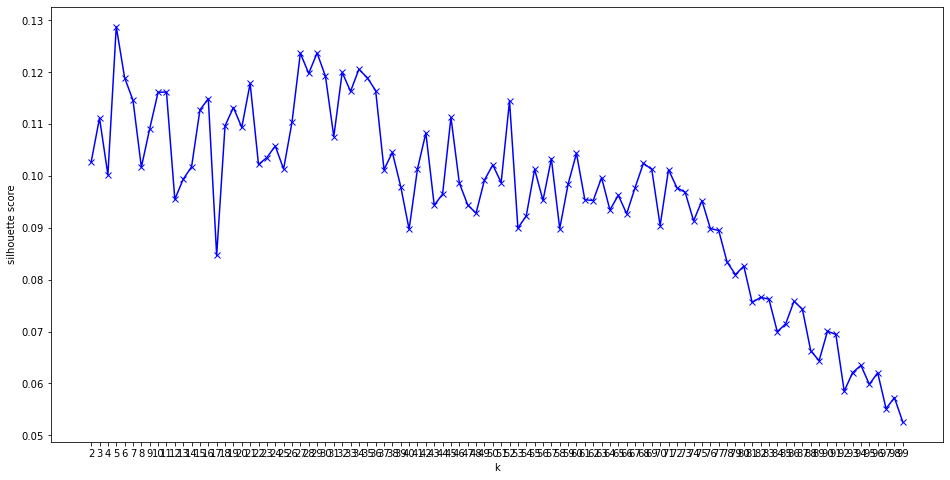

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

K = range(2, 100)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(num_trans)
    silhouette.append(silhouette_score(num_trans, kmeans.predict(num_trans)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

C:\Users\Karo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


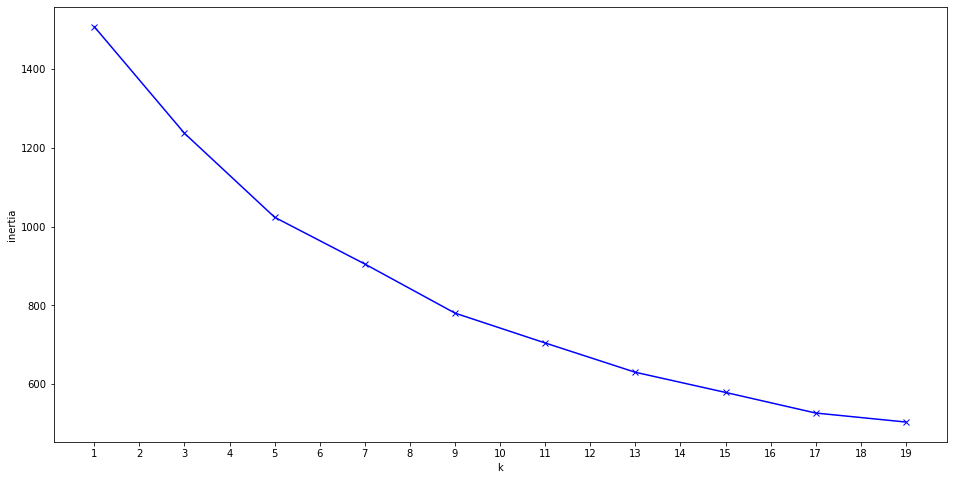

In [67]:
K = range(1, 20,2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(num_trans)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()